# Maksimizacija vsote robov

In [1]:
clp = MixedIntegerLinearProgram(maximization=True)

In [2]:
x = clp.new_variable(binary=True)

In [3]:
n = 12

In [4]:
for i in range(n):
    clp.add_constraint(sum(x[i, j] + 2*x[j, i] for j in range(n)) == 2)

## Naključni izbor točk

In [5]:
p = {i: (random(), random()) for i in range(n)}

In [6]:
p.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

In [7]:
p.values()

dict_values([(0.6887099692480472, 0.9322832924945672), (0.7438178800504593, 0.06224414505163034), (0.6055308655805036, 0.022798265304523224), (0.6243013520170636, 0.7650205605996576), (0.7604298074294689, 0.28858822644093296), (0.6272833132562574, 0.5700424036045686), (0.7118740346590944, 0.4909871227635574), (0.4585494156697376, 0.2272534029836193), (0.6592811917502632, 0.24615019606476463), (0.8652278030437257, 0.2948722780657941), (0.5189564107741171, 0.9283632900030229), (0.8253531692225035, 0.39170018679125085)])

## V matriki M so dolžine med točkami

In [8]:
M = matrix(RR,n)


In [9]:
for i in range(n):
    for j in range(n):
        M[i,j] = (((p[i][0])-(p[j][0]))^2 + ((p[i][1])-(p[j][1]))^2)^((0.5))

In [10]:
str(M)

'[0.000000000000000 0.871782656352051 0.913280777181810 0.179235296341306 0.647678217366125 0.367412160454917 0.441903703702093 0.741647507598653 0.686763917923301 0.661401048504639 0.169798813406030 0.557585382045747]\n[0.871782656352051 0.000000000000000 0.143802906090374 0.712866671070889 0.226952857023684 0.520998442077622 0.429931331953927 0.329554474970984 0.202405255040501 0.262404683020114 0.894832416498445 0.339395472596656]\n[0.913280777181810 0.143802906090374 0.000000000000000 0.742459606170088 0.307632874749795 0.547676287494397 0.480114232093232 0.251804388248595 0.229728497443576 0.376120682424932 0.909693987108971 0.429430405135774]\n[0.179235296341306 0.712866671070889 0.742459606170088 0.000000000000000 0.495498461556540 0.195000958454141 0.287686113320392 0.562731925710032 0.520048117370242 0.528284925370622 0.194366673826613 0.424016432113259]\n[0.647678217366125 0.226952857023684 0.307632874749795 0.495498461556540 0.000000000000000 0.311359025489026 0.208141721675

## Funkcija 'seka' pove ali daljica ij seka daljico lk

In [11]:
def zasuk(a,b,c):
    A = matrix(RR,3)
    A[0] = (1, p[a][0],p[a][1])
    A[1] = (1, p[b][0],p[b][1])
    A[2] = (1, p[c][0],p[c][1])
    return(det(A))

In [12]:
def seka(a,b,c,d):
    if zasuk(a,b,c)*zasuk(a,b,d)<0 and zasuk(a,c,d)*zasuk(b,c,d)<0:
        return(1)
    else:
        return(0)

In [13]:
seka(1,2,3,4)

0

In [14]:
zasuk(1,2,3)

-0.101899286938631

In [15]:
for i in range(n):
    for j in range(n):
        for k in range(n):
            for l in range(n):
                clp.add_constraint(x[i,j]+x[j,i]+x[k,l]+x[l,k]+seka(i,j,k,l)<=2)

In [16]:
clp.set_objective(sum(x[i, j]*M[i,j] for i in range(n) for j in range(n)))

In [17]:
clp.solve()

4.5373244893464255

In [18]:
povezave = clp.get_values(x)
povezave

{(0, 0): 0.0,
 (0, 1): 0.0,
 (1, 0): 0.0,
 (0, 2): 0.0,
 (2, 0): 0.0,
 (0, 3): 0.0,
 (3, 0): 0.0,
 (0, 4): 1.0,
 (4, 0): 0.0,
 (0, 5): 0.0,
 (5, 0): 0.0,
 (0, 6): 0.0,
 (6, 0): 0.0,
 (0, 7): 0.0,
 (7, 0): 0.0,
 (0, 8): 0.0,
 (8, 0): 0.0,
 (0, 9): 1.0,
 (9, 0): 0.0,
 (0, 10): 0.0,
 (10, 0): 0.0,
 (0, 11): 0.0,
 (11, 0): 0.0,
 (1, 1): 0.0,
 (1, 2): 0.0,
 (2, 1): 0.0,
 (1, 3): 0.0,
 (3, 1): 0.0,
 (1, 4): 0.0,
 (4, 1): 0.0,
 (1, 5): 0.0,
 (5, 1): 0.0,
 (1, 6): 1.0,
 (6, 1): 0.0,
 (1, 7): 0.0,
 (7, 1): 0.0,
 (1, 8): 0.0,
 (8, 1): 0.0,
 (1, 9): 0.0,
 (9, 1): 0.0,
 (1, 10): 0.0,
 (10, 1): 0.0,
 (1, 11): 1.0,
 (11, 1): 0.0,
 (2, 2): 0.0,
 (2, 3): 0.0,
 (3, 2): 0.0,
 (2, 4): 0.0,
 (4, 2): 0.0,
 (2, 5): 0.0,
 (5, 2): 0.0,
 (2, 6): 0.0,
 (6, 2): 0.0,
 (2, 7): 0.0,
 (7, 2): 0.0,
 (2, 8): 0.0,
 (8, 2): 0.0,
 (2, 9): 0.0,
 (9, 2): 0.0,
 (2, 10): 0.0,
 (10, 2): 1.0,
 (2, 11): 0.0,
 (11, 2): 0.0,
 (3, 3): 0.0,
 (3, 4): 0.0,
 (4, 3): 0.0,
 (3, 5): 0.0,
 (5, 3): 0.0,
 (3, 6): 0.0,
 (6, 3): 0.0,
 (3, 7):

In [19]:
G = Graph([e for e, v in clp.get_values(x).items() if v == 1])
G._pos = p

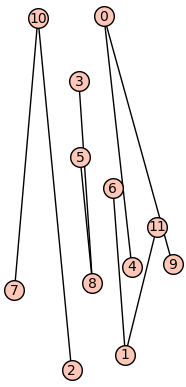

In [20]:
G.plot()

# Maksimizacija najkrajšega roba

In [24]:
clp2 = MixedIntegerLinearProgram(maximization=True)

In [25]:
y = clp2.new_variable(binary=True)

In [26]:
for i in range(n):
    clp2.add_constraint(sum(y[i, j] + 2*y[j, i] for j in range(n)) == 2)

In [27]:
for i in range(n):
    for j in range(n):
        for k in range(n):
            for l in range(n):
                clp2.add_constraint(y[i,j]+y[j,i]+y[k,l]+y[l,k]+seka(i,j,k,l)<=2)

In [28]:
from heapq import nlargest

In [29]:
nlargest(3,(M[i,j] for i in range(n) for j in range(n)))

[0.913280777181810, 0.913280777181810, 0.909693987108971]

In [81]:
sorted(M[i,j] for i in range(n) for j in range(n))

[0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.0795404998181121,
 0.0795404998181121,
 0.0953065800488907,
 0.0953065800488907,
 0.156359879053657,
 0.156359879053657,
 0.161422594503783,
 0.161422594503783,
 0.228250993293199,
 0.228250993293199,
 0.246840158532472,
 0.246840158532472,
 0.251113727077339,
 0.251113727077339,
 0.322094830726306,
 0.322094830726306,
 0.348601695753781,
 0.348601695753781,
 0.449281066700106,
 0.449281066700106,
 0.496955712998949,
 0.496955712998949,
 0.518281827275488,
 0.518281827275488,
 0.526282510378465,
 0.526282510378465,
 0.558020329542142,
 0.558020329542142,
 0.564967646846127,
 0.564967646846127,
 0.615481011331659,
 0.615481011331659,
 0.641584936909012,
 0.641584936909012,
 0.668530672442328,
 0.668530672442328,
 0.676913834534086,
 0.676913834534086,
 0.680905338920181,
 0.680905338920181,
 0.6816125348733

In [65]:
sorted(M[i,j] for i in range(n) for j in range(n))[-6]

1.02519359300568

In [56]:
max_symbolic(M[i,j] for i in range(n) for j in range(n))

1.17124555097897

In [71]:
min_symbolic(M[i,j] for i in range(n) for j in range(i+1,n))

0.0795404998181121

## Težava ker ne dovoli < ampak potrebujem <=

In [30]:
clp2.set_objective(min_symbolic(nlargest(n*(2/3),(y[i,j]*M[i,j] for i in range(n) for j in range(n)))))

ValueError: strict < is not allowed, use <= instead

In [31]:
clp2.solve()

0.0

In [76]:
povezave2 = clp2.get_values(y)
povezave2

{(0, 0): 0.0,
 (0, 1): 0.0,
 (1, 0): 0.0,
 (0, 2): 0.0,
 (2, 0): 0.0,
 (0, 3): 0.0,
 (3, 0): 0.0,
 (0, 4): 0.0,
 (4, 0): 0.0,
 (0, 5): 0.0,
 (5, 0): 0.0,
 (0, 6): 0.0,
 (6, 0): 1.0,
 (0, 7): 0.0,
 (7, 0): 0.0,
 (0, 8): 0.0,
 (8, 0): 0.0,
 (1, 1): 0.0,
 (1, 2): 1.0,
 (2, 1): 0.0,
 (1, 3): 0.0,
 (3, 1): 0.0,
 (1, 4): 0.0,
 (4, 1): 0.0,
 (1, 5): 0.0,
 (5, 1): 0.0,
 (1, 6): 0.0,
 (6, 1): 0.0,
 (1, 7): 0.0,
 (7, 1): 0.0,
 (1, 8): 1.0,
 (8, 1): 0.0,
 (2, 2): 0.0,
 (2, 3): 0.0,
 (3, 2): 0.0,
 (2, 4): 0.0,
 (4, 2): 0.0,
 (2, 5): 0.0,
 (5, 2): 0.0,
 (2, 6): 0.0,
 (6, 2): 0.0,
 (2, 7): 0.0,
 (7, 2): 0.0,
 (2, 8): 0.0,
 (8, 2): 0.0,
 (3, 3): 0.0,
 (3, 4): 0.0,
 (4, 3): 0.0,
 (3, 5): 0.0,
 (5, 3): 0.0,
 (3, 6): 0.0,
 (6, 3): 1.0,
 (3, 7): 0.0,
 (7, 3): 0.0,
 (3, 8): 0.0,
 (8, 3): 0.0,
 (4, 4): 0.0,
 (4, 5): 1.0,
 (5, 4): 0.0,
 (4, 6): 0.0,
 (6, 4): 0.0,
 (4, 7): 1.0,
 (7, 4): 0.0,
 (4, 8): 0.0,
 (8, 4): 0.0,
 (5, 5): 0.0,
 (5, 6): 0.0,
 (6, 5): 0.0,
 (5, 7): 0.0,
 (7, 5): 0.0,
 (5, 8): 0.0,
 (8, 5

In [77]:
G2 = Graph([e for e, v in clp2.get_values(y).items() if v == 1])
G2._pos = p

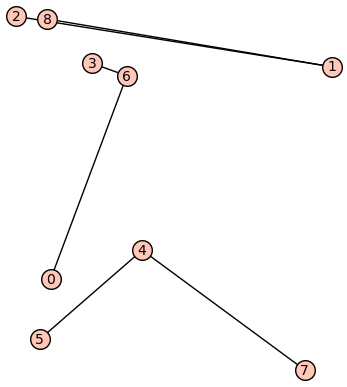

In [78]:
G2.plot()